In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import numpy as np

class ART1:
    def __init__(self, num_input, num_categories, vigilance):
        self.num_input = num_input
        self.num_categories = num_categories
        self.vigilance = vigilance
        self.weights = np.random.rand(num_categories, num_input)
        self.category_activations = np.zeros(num_categories)

    def normalize_input(self, input_vector):
        return input_vector / np.sum(input_vector)

    def compute_category_activations(self, input_vector):
        self.category_activations = np.dot(self.weights, input_vector)

    def category_response(self):
        return np.argmax(self.category_activations)

    def learn(self, input_vector):
        input_vector = self.normalize_input(input_vector)
        self.compute_category_activations(input_vector)
        while True:
            category_index = self.category_response()
            category_activation = self.category_activations[category_index]
            if np.all(input_vector <= category_activation) and np.dot(self.weights[category_index], input_vector) >= self.vigilance:
                break
            self.weights[category_index] = np.minimum(1, self.weights[category_index] + input_vector)
            self.compute_category_activations(input_vector)

    def predict(self, input_vector):
        input_vector = self.normalize_input(input_vector)
        self.compute_category_activations(input_vector)
        category_index = self.category_response()
        return category_index

# Example usage
if __name__ == "__main__":
    # Define parameters
    num_input = 5
    num_categories = 3
    vigilance = 0.9

    # Create ART1 network
    art = ART1(num_input, num_categories, vigilance)

    # Input patterns
    input_patterns = np.array([
        [1, 0, 1, 0, 1],
        [0, 1, 1, 0, 0],
        [1, 1, 0, 0, 1]
    ])

    # Learn input patterns
    for pattern in input_patterns:
        art.learn(pattern)

    # Test the network with new patterns
    test_patterns = np.array([
        [1, 0, 0, 0, 1],
        [0, 0, 1, 1, 0]
    ])

    print("Testing the ART1 network:")
    for pattern in test_patterns:
        category_index = art.predict(pattern)
        print("Input pattern:", pattern, "Category:", category_index)


Testing the ART1 network:
Input pattern: [1 0 0 0 1] Category: 2
Input pattern: [0 0 1 1 0] Category: 2


In [18]:
# Create ART1 network with different parameters
art_high_vigilance = ART1(num_input, num_categories, vigilance=0.95)
art_low_vigilance = ART1(num_input, num_categories, vigilance=0.8)

# Test performance on known patterns
print("Testing performance on known patterns:")
for pattern in input_patterns:
    print("Input pattern:", pattern)
    print("High vigilance category:", art_high_vigilance.predict(pattern))
    print("Low vigilance category:", art_low_vigilance.predict(pattern))

# Test performance on unseen patterns
print("\nTesting performance on unseen patterns:")
for pattern in test_patterns:
    print("Input pattern:", pattern)
    print("High vigilance category:", art_high_vigilance.predict(pattern))
    print("Low vigilance category:", art_low_vigilance.predict(pattern))

# Test convergence
print("\nTesting convergence:")
for pattern in input_patterns:
    print("Training with pattern:", pattern)
    art.learn(pattern)
    print("Category activations:", art.category_activations)

print("\nTesting robustness to noise:")
noisy_pattern = [1, 0.1, 0, 0, 1]
print("Noisy pattern:", noisy_pattern)
print("High vigilance category:", art_high_vigilance.predict(noisy_pattern))
print("Low vigilance category:", art_low_vigilance.predict(noisy_pattern))

Testing performance on known patterns:
Input pattern: [1 0 1 0 1]
High vigilance category: 2
Low vigilance category: 0
Input pattern: [0 1 1 0 0]
High vigilance category: 2
Low vigilance category: 0
Input pattern: [1 1 0 0 1]
High vigilance category: 2
Low vigilance category: 1

Testing performance on unseen patterns:
Input pattern: [1 0 0 0 1]
High vigilance category: 0
Low vigilance category: 1
Input pattern: [0 0 1 1 0]
High vigilance category: 0
Low vigilance category: 0

Testing convergence:
Training with pattern: [1 0 1 0 1]
Category activations: [0.43718784 0.30795263 0.97618769]
Training with pattern: [0 1 1 0 0]
Category activations: [0.36977309 0.47159831 1.        ]
Training with pattern: [1 1 0 0 1]
Category activations: [0.45831363 0.48313088 0.97618769]

Testing robustness to noise:
Noisy pattern: [1, 0.1, 0, 0, 1]
High vigilance category: 2
Low vigilance category: 1


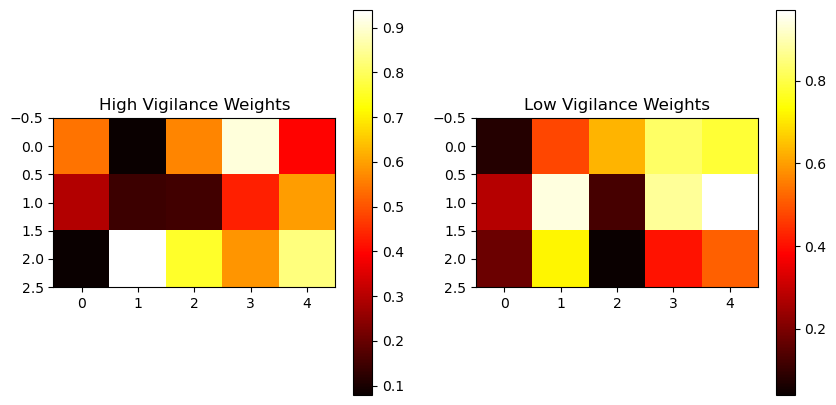

In [20]:
#plot the results 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(art_high_vigilance.weights, cmap='hot', interpolation='nearest')
plt.title("High Vigilance Weights")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(art_low_vigilance.weights, cmap='hot', interpolation='nearest')
plt.title("Low Vigilance Weights")
plt.colorbar()
plt.show()